In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('/content/cirrhosis.csv')

df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


<Axes: >

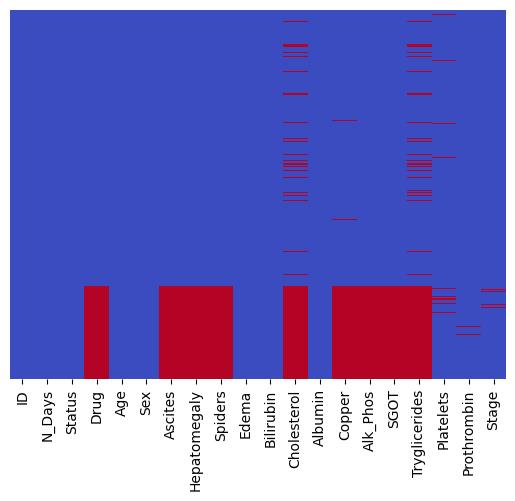

In [3]:
sns.heatmap(df.isnull(), cmap='coolwarm',xticklabels=True,yticklabels=False,cbar=False)

In [4]:
corr = df['ID'].corr(df['Prothrombin'])
round(corr)

0

In [5]:
df.pop('ID')

0        1
1        2
2        3
3        4
4        5
      ... 
413    414
414    415
415    416
416    417
417    418
Name: ID, Length: 418, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
ENC = LabelEncoder()
status = ENC.fit_transform(df['Status'])
sex = ENC.fit_transform(df['Sex'])
drug = ENC.fit_transform(df['Drug'])
ascites = ENC.fit_transform(df['Ascites'])
hepat = ENC.fit_transform(df['Hepatomegaly'])
spiders = ENC.fit_transform(df['Spiders'])
edema = ENC.fit_transform(df['Edema'])

In [7]:
df['Status'] = status
df['Sex'] = sex
df['Drug'] = drug
df['Ascites'] = ascites
df['Hepatomegaly'] = hepat
df['Spiders'] = spiders
df['Edema'] = edema

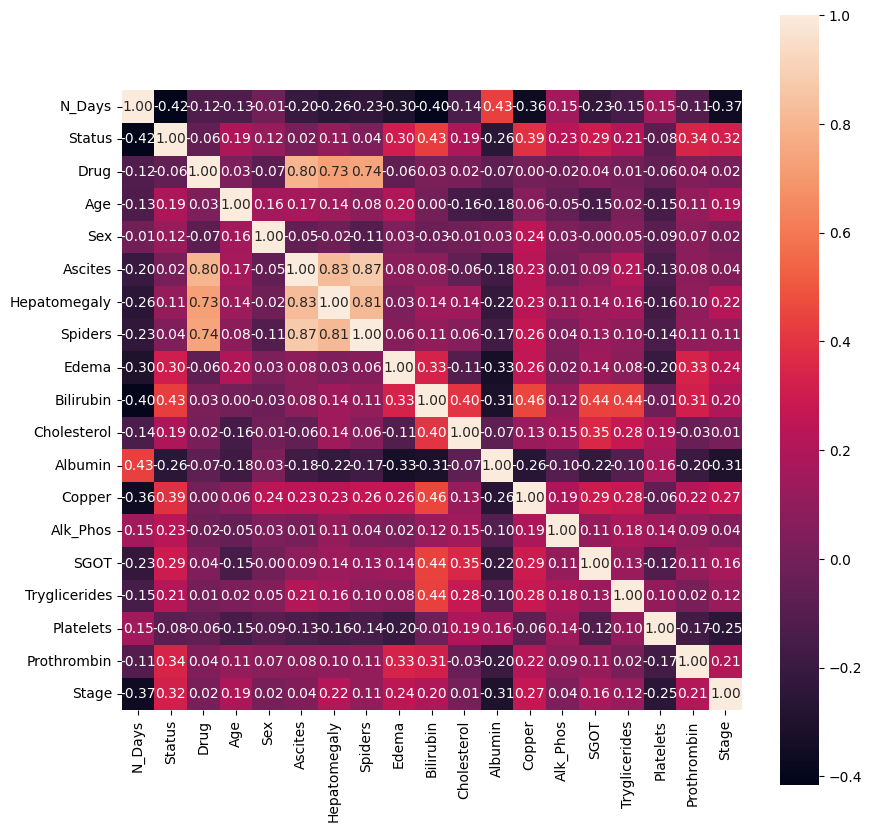

In [8]:
correlations = df.corr()

#visualization
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=0, copy=True)

In [10]:
imputer = imputer.fit(df.iloc[:,9:10])
df.iloc[:,9:10]= imputer.transform(df.iloc[:,9:10])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [11]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,2,2,24472,0,2,2,2,0,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,1103,0,2,14245,0,2,2,2,0,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,1055,0,2,20819,0,2,2,2,0,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,691,0,2,21185,0,2,2,2,0,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [12]:
chol_mean = df['Cholesterol'].mean()
copper_mean = df['Copper'].mean()
alk_mean = df['Alk_Phos'].mean()
sgot_mean = df['SGOT'].mean()
tryg_mean = df['Tryglicerides'].mean()
plat_mean = df['Platelets'].mean()
proth_mean = df['Prothrombin'].mean()
stage_mean = df['Stage'].mean()
df['Cholesterol'].fillna(chol_mean, inplace=True)
df['Copper'].fillna(copper_mean, inplace=True)
df['Alk_Phos'].fillna(alk_mean, inplace=True)
df['SGOT'].fillna(sgot_mean, inplace=True)
df['Tryglicerides'].fillna(tryg_mean, inplace=True)
df['Platelets'].fillna(plat_mean, inplace=True)
df['Prothrombin'].fillna(proth_mean, inplace=True)
df['Stage'].fillna(stage_mean, inplace=True)

<Axes: >

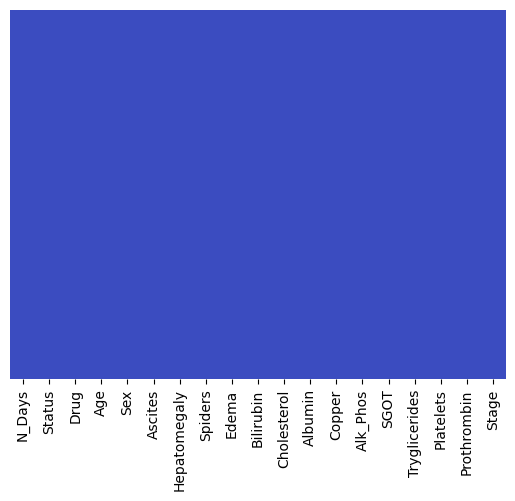

In [13]:
sns.heatmap(df.isnull(), cmap='coolwarm',xticklabels=True,yticklabels=False,cbar=False)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    int64  
 2   Drug           418 non-null    int64  
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    int64  
 5   Ascites        418 non-null    int64  
 6   Hepatomegaly   418 non-null    int64  
 7   Spiders        418 non-null    int64  
 8   Edema          418 non-null    int64  
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    418 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         418 non-null    float64
 13  Alk_Phos       418 non-null    float64
 14  SGOT           418 non-null    float64
 15  Tryglicerides  418 non-null    float64
 16  Platelets      418 non-null    float64
 17  Prothrombin    418 non-null    float64
 18  Stage     

In [15]:
df.shape

(418, 19)

In [16]:
df.skew()

N_Days           0.472602
Status           0.345418
Drug             0.223005
Age              0.086850
Sex              2.581753
Ascites          0.968741
Hepatomegaly     0.194148
Spiders          0.561421
Edema            2.517545
Bilirubin        2.717611
Cholesterol      4.128147
Albumin         -0.467527
Copper           2.671624
Alk_Phos         3.459876
SGOT             1.675349
Tryglicerides    3.067463
Platelets        0.635454
Prothrombin      2.228575
Stage           -0.499848
dtype: float64

<Axes: xlabel='Stage', ylabel='Age'>

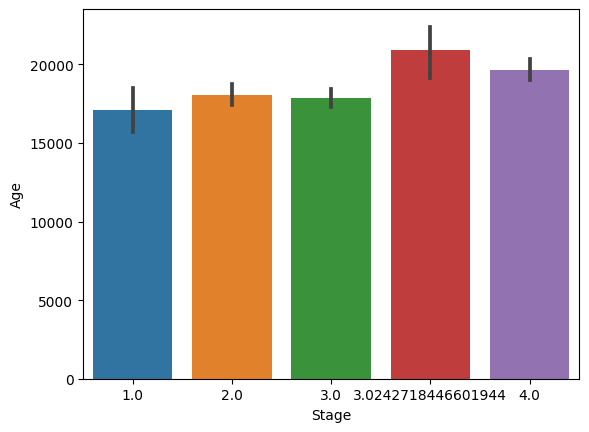

In [17]:
sns.barplot(x='Stage',y='Age',data =df)

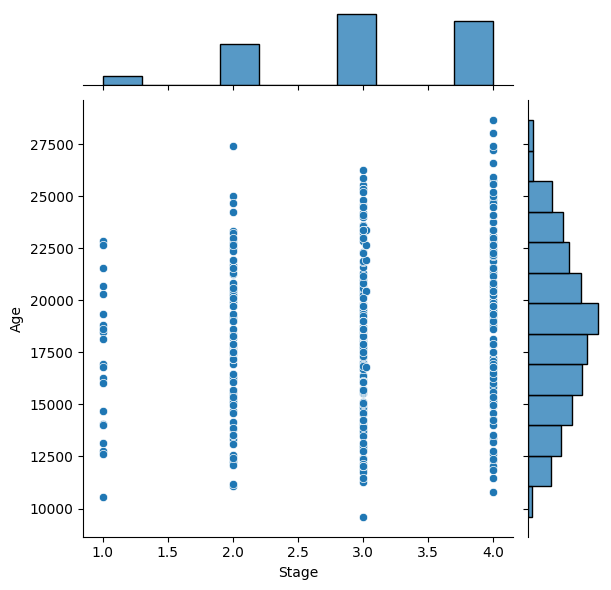

In [18]:
sns.jointplot(x='Stage',y='Age',data =df)

<ipython-input-19-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

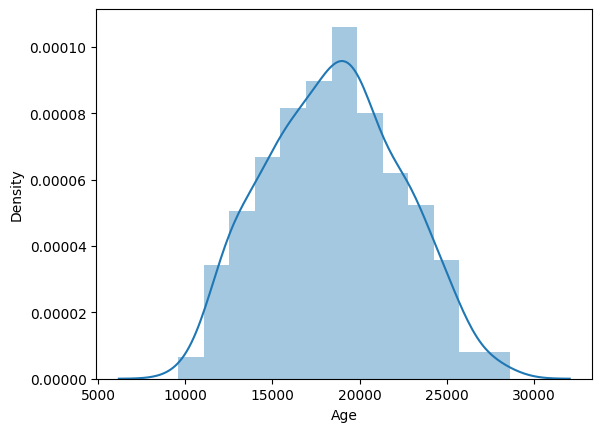

In [19]:
sns.distplot(df['Age'])

<Axes: xlabel='Sex', ylabel='count'>

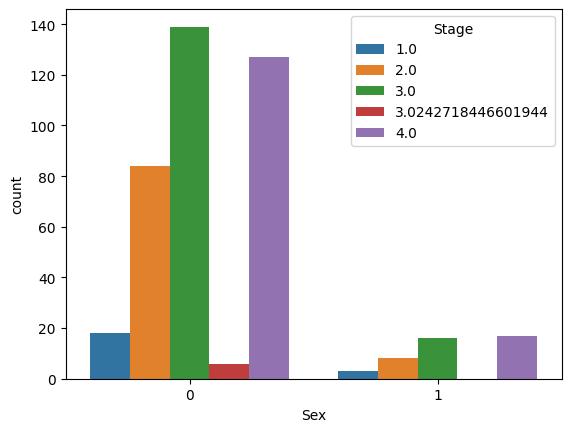

In [20]:
sns.countplot(x='Sex',data=df,hue='Stage')

<Axes: xlabel='Sex', ylabel='Age'>

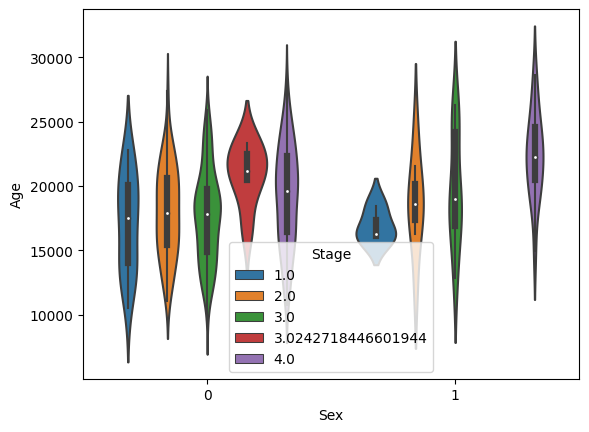

In [21]:
sns.violinplot(x='Sex',y='Age',hue='Stage',data=df)

<Axes: >

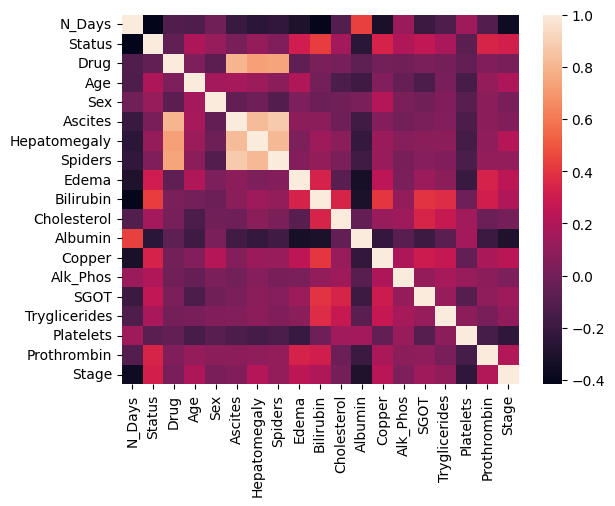

In [22]:
sns.heatmap(df.corr())

**Preparing data for Machine Learning Algorithms**


In [23]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [24]:
y = df['Stage']
df.pop('Stage')
X = df

In [25]:
for i in range(len(y)):
  y[i] = int(y[i])

<ipython-input-25-20a36adbc3fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(y[i])


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape

(334, 18)

# Logistic Regression


In [28]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression().fit(X_train, y_train)
log.score(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.47604790419161674

In [29]:
y_pred = log.predict(X_test)
accuracy_score(y_test, y_pred)*100

47.61904761904761

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.33      0.19      0.24        16
         3.0       0.47      0.50      0.49        34
         4.0       0.51      0.65      0.57        31

    accuracy                           0.48        84
   macro avg       0.33      0.33      0.32        84
weighted avg       0.44      0.48      0.45        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


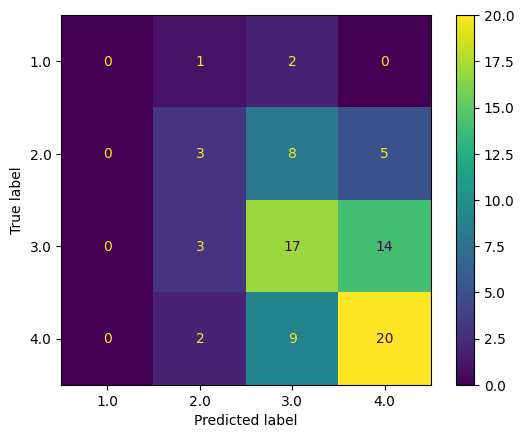

In [31]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=log.classes_)
disp.plot()
plt.show()

# Support Vector Machine


In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svc = SVC()
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
clf.score(X_train, y_train)*100

68.8622754491018

In [33]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)*100

53.57142857142857

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.17      0.06      0.09        16
         3.0       0.50      0.74      0.60        34
         4.0       0.68      0.61      0.64        31

    accuracy                           0.54        84
   macro avg       0.34      0.35      0.33        84
weighted avg       0.48      0.54      0.50        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


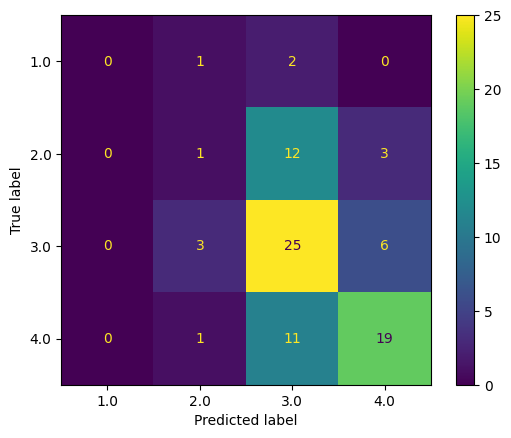

In [35]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot()
plt.show()